# Chicago Car Crash Analysis

## Overview
This project analyzes traffic crash data from Chicago's Open Data Portal to identify patterns and factors contributing to accidents. By leveraging datasets on crash incidents, involved people, and vehicles, the analysis provides actionable insights into high-risk conditions and behaviors. The results aim to inform public safety initiatives and reduce traffic incidents through data-driven decisions.

![alt text](./images/chicago_header_image.jpg)
*Photo by [Sawyer Bengtson](https://unsplash.com/@sawyerbengtson) on Unsplash*
___

## Table of Contents

### 1. [Business Understanding](#Business-Understanding)
* 1.1 [Background](#Background)
* 1.2 [Goals](#Goals)
* 1.3 [Success Criteria](#Success-Criteria)
   
### 2. [Data Understanding](#Data-Understanding)


### 3. [Data Preparation](#Data-Preparation)

### 4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)


### 5. [Modeling](#Modeling)


### 6. [Evaluation](#Evaluation)

### 7. [Conclusion](#Conclusion)
* 7.1 [Limitations](#Limitations)
* 7.2 [Recommendations](#Recommendations)
* 7.3 [Next Steps](#Next-Steps)

### 8. [Resources](#Resources)

## 1. <a name ="Business-Understanding"></a> Business Understanding

### 1.1 <a name ="Background"></a> Background 

Vision Zero is a traffic safety initiative aimed at eliminating traffic deaths and making travel safer. While many cities across the U.S. have signed pledges to achieve the goal of Vision Zero, traffic deaths remain a persistent issue. As of the date of this project, in 2024, the state of Illinois recorded 1,111 traffic deaths, with Cook County (including Chicago) reporting 361 fatalities ([source](https://apps.dot.illinois.gov/FatalCrash/snapshot.html)). Traffic safety is also a pressing issue of equity. Research and data have shown that Black and Brown communities, particularly in urban areas like Chicago and Philadelphia, are disproportionately affected by traffic fatalities. These communities are often exposed to less investment in infrastructure, which contributes to higher rates of fatalities.


One distinguishing aspect of traffic fatalities is that they are largely preventable. Existing research highlights speed as one of the leading contributors to traffic deaths, with speed often seen as a critical factor in the severity of crashes. This raises the question: How do we get drivers to slow down? The deeper issue becomes a question of behavior change, which is much trickier to address. Different strategies have been employed to varying degrees, but there is often debate over the most effective methods to achieve meaningful change in driver behavior, such as the use of speed cushions, lowering speed limits, trimming lane size, or increasing police presence in high-speed areas.

### 1.2 <a name ="Goals"></a> Goals

The goal of this project is to develop a model that predicts whether a crash resulted in serious or fatal injuries. For the purposes of this project, ‘serious’ injuries refer to ‘incapacitating’ injuries, as defined by Chicago’s Department of Transportation (CDOT). CDOT defines incapacitating injuries as injuries that prevent an individual from walking, driving, or performing normal activities. By predicting crash severity, the model aims to identify which factors—such as speed, road conditions, road design, enforcement, and vehicle type & size—are most strongly associated with the outcomes. The analysis will be based on data from Chicago’s open data portal, which includes detailed records on traffic incidents across the city.


The model will be designed to be easily interpretable, meaning it will provide clear and understandable explanations for how it arrives at its predictions. This is crucial for decision-makers, as it allows them to trust the model’s results and use it to guide traffic safety policies and resource allocation. An easily interpretable model will help agencies like CDOT and the Chicago Metropolitan Agency for Planning (CMAP) target resources more effectively, allow policymakers to evaluate the impact of different safety strategies, and help make informed decisions about where to focus their efforts. Ultimately, this model will assist in making data-driven decisions that reduce fatalities and improve the overall safety of Chicago’s roadways.

### 1.3 <a name ="Success-Criteria"></a> Success Criteria

The success of this project will be determined by how easily the model can explain its predictions and which features are driving the outcomes. Although the focus is on model interpretability, measuring the model’s ability to accurately predict whether a crash resulted in serious or fatal injuries is also a key success criterion, as it provides information about how confident we can be about the results. Since this will be treated as a classification problem (i.e., classifying a crash to have fatal/serious injuries or not), classification metrics that I will measure are accuracy, precision, recall, and F1.


The model will be considered successful if it achieves moderate accuracy (e.g., between 65% and 80%) and provides clear, actionable insights that guide traffic safety policies and resource allocation. This moderate accuracy ensures that the insights gained from the model are trustworthy enough for stakeholders to implement targeted interventions effectively.

## 2. <a name ="Data-Understanding"></a> Data Understanding

The data for this project came from the city of [Chicago's Data Portal](https://data.cityofchicago.org/). Within this database, I used three different traffic crash datasets: 
1. [Traffic Crashes - Crashes](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data): Contains detailed information about each traffic crash that occurred within the City of Chicago.
    * Total of **901k** observations with **48** features.
        * Includes fields such as crash date, crash location, weather conditions, road conditions, and contributing factors like speed limits.
    * Unique identifier for each crash is the `CRASH_RECORD_ID`.
    * Updated regularly, with the most recent update on Dec 12, 2024.
    * Earliest recorded data dates back to March of 2023.
<br><br>

2. [Traffic Crashes - People](https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d/about_data): Provides information about individuals involved in a traffic crash, including details about their injuries 
    * Total of **1.98M** observations with **29** features.
        * Each record corresponds to an occupant in a vehicle listed in the Crash dataset, and it includes data such as the type of injury, role (driver, passenger, pedestrian, etc.), and whether the individual sustained any injuries.
    * The unique identifier for each record is `CRASH_RECORD_ID`.
    * Updated regularly, with the most recent update on Dec 12, 2024.
    * Earliest recorded data dates back to March of 2023.
<br><br>

3. [Traffic Crashes - Vehicles](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/about_data): Contains information about the vehicle(s) involved in traffic crashes. 
   
    * Total of **1.84M** observations with **71** features.
        * Each “unit” involved in a crash (e.g., motor vehicles, bicycles, pedestrians) is assigned a record. 
        * Information about the vehicle type, damage, and trajectory, as well as the relationship with the individuals involved (drivers, passengers, pedestrians).
        
    * Links to the `Crash` and `People` datasets using the `CRASH_RECORD_ID`. 
    * Updated regularly, with the most recent update on Dec 12, 2024.
    * Earliest recorded data dates back to March of 2023.

### 2.1 Importing Necessary Libraries and Data

In [1]:
# for getting data
import os
import requests
from tqdm import tqdm

# for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

# for modeling

In [2]:
# The datasets used in this project can be downloaded from the following links:
# 1. Traffic Crashes Data: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if
# 2. People Involved in Traffic Incidents: https://data.cityofchicago.org/Public-Safety/People-Involved-in-Traffic-Incidents/u6pd-qa9d
# 3. Vehicles Involved in Traffic Incidents: https://data.cityofchicago.org/Public-Safety/Vehicles-Involved-in-Traffic-Incidents/68nd-jvt3

def download_file(url, filename):
    
    """
    Downloads a file from the given URL and saves it locally with the specified filename.
    
    This function checks if the file already exists in the specified location. If the file 
    does not exist, it will download the file from the provided URL and save it to the 
    specified filename. A progress bar is shown during the download. If the file already 
    exists, the download is skipped, and a message is printed indicating the file exists.

    Parameters:
    url (str): The URL from which the file will be downloaded.
    filename (str): The local path (including filename) where the file will be saved.

    Returns:
    None
    """
    
    if not os.path.exists(filename):
        print(f"Downloading {filename} from {url}...")
        r = requests.get(url, stream=True)
        total_size = int(r.headers.get('content-length', 0))
        with open(filename, 'wb') as f, tqdm(total=total_size, unit='B', unit_scale=True) as bar:
            for chunk in r.iter_content(chunk_size=1024):
                bar.update(len(chunk))
                f.write(chunk)
        print(f"{filename} downloaded successfully.")
    else:
        print(f"{filename} already exists, skipping download.")

In [3]:
# Create a 'data' directory to store the datasets (if it doesn't exist)
if not os.path.exists('data'):
    os.mkdir('data')

In [4]:
# URLs 
urls = [
    # Crashes data
    "https://data.cityofchicago.org/api/views/85ca-t3if/rows.csv?accessType=DOWNLOAD",
    # People data
    "https://data.cityofchicago.org/api/views/u6pd-qa9d/rows.csv?accessType=DOWNLOAD",
    # Vehicles data
    "https://data.cityofchicago.org/api/views/68nd-jvt3/rows.csv?accessType=DOWNLOAD" 
]

In [ ]:
# filenames
filenames = ['data/traffic_crashes.csv', 'data/people.csv', 'data/vehicles.csv']

In [5]:
# Loop through each dataset and download if needed
for url, filename in zip(urls, filenames):
    download_file(url, filename)

data/traffic_crashes.csv already exists, skipping download.
data/people.csv already exists, skipping download.
data/vehicles.csv already exists, skipping download.


In [6]:
# Read the CSV files into pandas DataFrames
crashes_df = pd.read_csv('data/traffic_crashes.csv', low_memory=False)
people_df = pd.read_csv('data/people.csv', low_memory=False)
vehicles_df = pd.read_csv('data/vehicles.csv', low_memory=False)

### 2.2 Data Understanding Function

In [7]:
# Dataset understanding function
def dataset_understanding(dataset_path, date_col=None):
    """
    Automates the process of understanding the structure and contents of a given dataset.

    This function provides an overview of the dataset by:
    - Loading the dataset from a specified CSV file.
    - Displaying the first few rows of the dataset.
    - Printing information about the columns and data types.
    - Calculating and displaying the percentage of missing values for each feature.
    - Displaying the value counts and number of unique values for each feature.
    - Plotting histograms for numeric features and bar charts for categorical features.
    - Analyzing a date column (if specified) to identify the earliest and latest dates.

    Parameters:
    dataset_path (str): The path to the dataset CSV file to be analyzed.
    date_col (str, optional): The name of the column containing date values to analyze. 
                              If provided, the function will calculate the earliest and latest dates.

    Returns:
    pandas.DataFrame: The loaded DataFrame with the dataset contents.
    
    """
    # Read the dataset
    print(f"Loading dataset from {dataset_path}...\n")
    df = pd.read_csv(dataset_path, low_memory=False)
    
    # Print the first 5 rows
    print("First 5 rows of the dataset:\n")
    print(df.head(), "\n")
    
    # Print info about columns
    print("DataFrame Info:\n")
    print(df.info(), "\n")
    
    # Calculate and print percentage of missing values
    print("Percentage of missing values in each feature:\n")
    print(round((df.isna().sum() / len(df) * 100), 2), "\n")
    
    # Loop through features and print value counts and unique values
    print("Value counts and number of unique values for each feature:\n")
    for feature in df.columns:
        print(f"Value counts for column '{feature}':")
        print(df[feature].value_counts())
        print(f"Number of unique values: {df[feature].nunique()}\n")
        print("-" * 50, "\n")
    
    # Plot histograms for numeric features
    numeric_cols = df.select_dtypes(include='number').columns
    print("Plotting histograms for numeric features...\n")
    df[numeric_cols].hist(bins=20, figsize=(12, 10))
    plt.tight_layout()
    plt.show()
    
    # Plot bar charts for categorical features (top 20 categories)
    categorical_cols = [col for col in df.select_dtypes(include='object').columns if col != 'CRASH_RECORD_ID']
    print("Plotting bar charts for categorical features (top 20 categories)...\n")
    n_cols = 3
    n_rows = math.ceil(len(categorical_cols) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, n_rows * 5))
    axes = axes.flatten()
    
    for i, col in enumerate(categorical_cols):
        ax = axes[i]
        top_categories = df[col].value_counts().head(20)
        top_categories.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
        ax.set_title(f'Bar Chart of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=0)
    
    for j in range(len(categorical_cols), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    
    # Analyze date column for earliest and latest dates if provided
    if date_col:
        print(f"Analyzing date column '{date_col}'...\n")
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
        earliest_date = df[date_col].min()
        latest_date = df[date_col].max()
        print(f"Earliest {date_col}: {earliest_date}")
        print(f"Latest {date_col}: {latest_date}\n")
    
    return df

### 2.2.1 Crashes Dataset

Loading dataset from ./data/Traffic_Crashes_-_Crashes_20241213.csv...

First 5 rows of the dataset:

                                     CRASH_RECORD_ID CRASH_DATE_EST_I  \
0  23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...              NaN   
1  2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...              NaN   
2  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...              NaN   
3  7ebf015016f83d09b321afd671a836d6b148330535d5df...              NaN   
4  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...              NaN   

               CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0  09/05/2023 07:05:00 PM                  30         TRAFFIC SIGNAL   
1  09/22/2023 06:45:00 PM                  50            NO CONTROLS   
2  07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
3  08/09/2023 11:00:00 PM                  30            NO CONTROLS   
4  08/18/2023 12:50:00 PM                  15                  OTHER   

       DEVICE_CONDITION WEA

Number of unique values: 901139

-------------------------------------------------- 

Value counts for column 'CRASH_DATE_EST_I':
Y    57974
N     8536
Name: CRASH_DATE_EST_I, dtype: int64
Number of unique values: 2

-------------------------------------------------- 

Value counts for column 'CRASH_DATE':
12/29/2020 05:00:00 PM    30
11/10/2017 10:30:00 AM    27
02/17/2022 03:30:00 PM    21
11/21/2024 10:30:00 AM    20
11/21/2024 10:00:00 AM    20
                          ..
04/22/2023 12:42:00 PM     1
10/06/2017 12:15:00 PM     1
09/24/2020 08:28:00 AM     1
10/07/2022 01:43:00 AM     1
03/15/2022 02:00:00 AM     1
Name: CRASH_DATE, Length: 592691, dtype: int64
Number of unique values: 592691

-------------------------------------------------- 

Value counts for column 'POSTED_SPEED_LIMIT':
30    663804
35     59613
25     57769
20     37704
15     32102
10     21091
40      8610
0       7584
45      5950
5       4955
55       883
50       276
3        221
9         96
39        95

Number of unique values: 2

-------------------------------------------------- 

Value counts for column 'DAMAGE':
OVER $1,500      567486
$501 - $1,500    232551
$500 OR LESS     101102
Name: DAMAGE, dtype: int64
Number of unique values: 3

-------------------------------------------------- 

Value counts for column 'DATE_POLICE_NOTIFIED':
10/12/2020 04:00:00 PM    12
02/26/2020 08:30:00 AM    12
12/01/2023 05:30:00 PM    12
11/05/2024 03:00:00 PM    11
10/18/2023 04:00:00 PM    11
                          ..
07/14/2018 11:45:00 AM     1
01/10/2017 12:18:00 PM     1
07/08/2017 02:40:00 PM     1
11/05/2021 01:03:00 PM     1
06/18/2020 04:30:00 PM     1
Name: DATE_POLICE_NOTIFIED, Length: 682604, dtype: int64
Number of unique values: 682604

-------------------------------------------------- 

Value counts for column 'PRIM_CONTRIBUTORY_CAUSE':
UNABLE TO DETERMINE                                                                 352571
FAILING TO YIELD RIGHT-OF-WAY                        

W    322675
S    300969
N    216673
E     60818
Name: STREET_DIRECTION, dtype: int64
Number of unique values: 4

-------------------------------------------------- 

Value counts for column 'STREET_NAME':
WESTERN AVE        24612
PULASKI RD         21766
CICERO AVE         20275
ASHLAND AVE        19600
HALSTED ST         17433
                   ...  
GRENSHAW               1
LASALLE ST             1
CORTEZ DR              1
SACREMENTO BLVD        1
29TH PL                1
Name: STREET_NAME, Length: 1648, dtype: int64
Number of unique values: 1648

-------------------------------------------------- 

Value counts for column 'BEAT_OF_OCCURRENCE':
1834.0    10911
114.0      9277
813.0      9088
815.0      8586
1831.0     8241
          ...  
1653.0      501
1655.0      313
1652.0      241
1650.0       69
6100.0        7
Name: BEAT_OF_OCCURRENCE, Length: 276, dtype: int64
Number of unique values: 276

-------------------------------------------------- 

Value counts for column 'PHOTOS_T

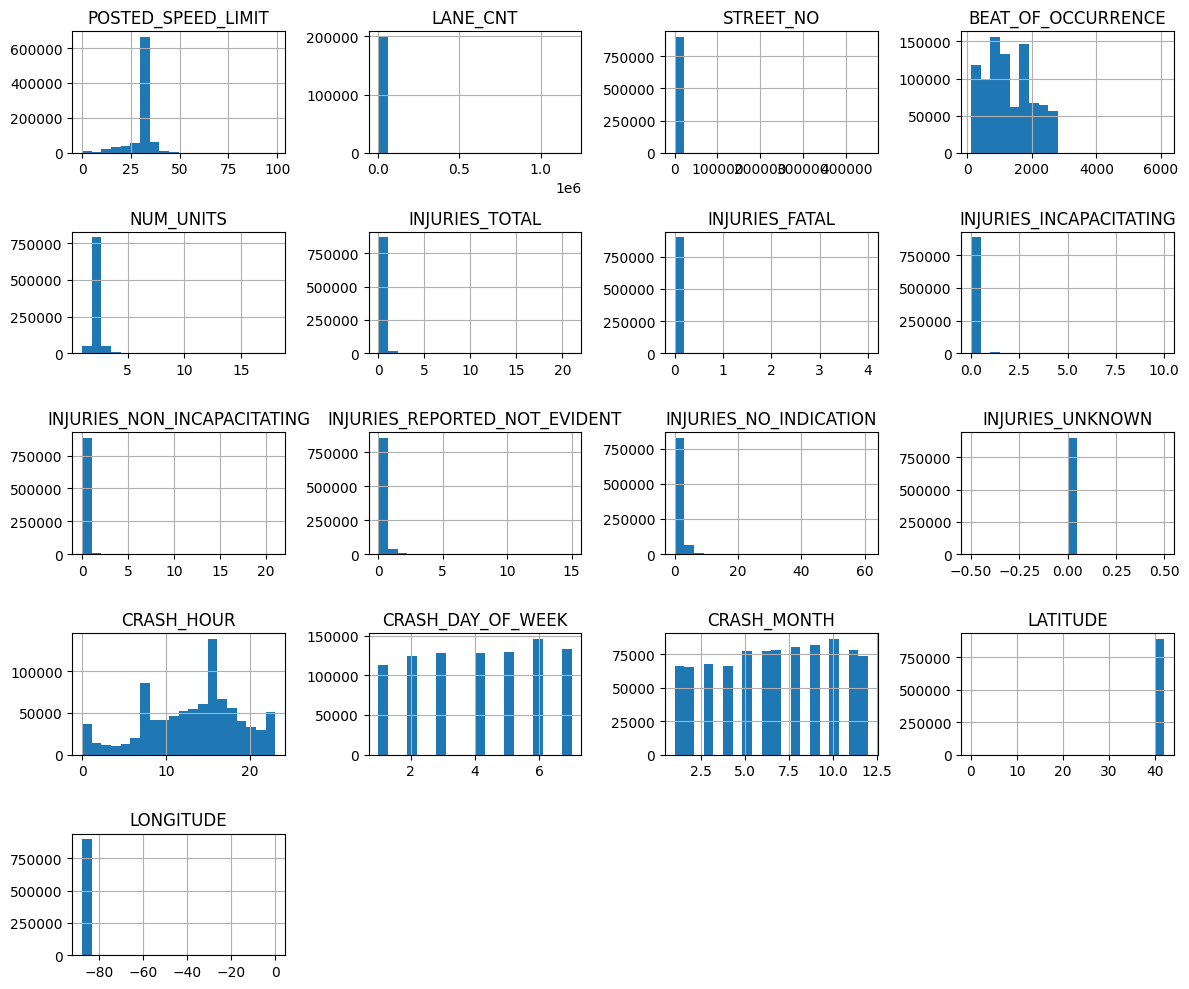

Plotting bar charts for categorical features (top 20 categories)...



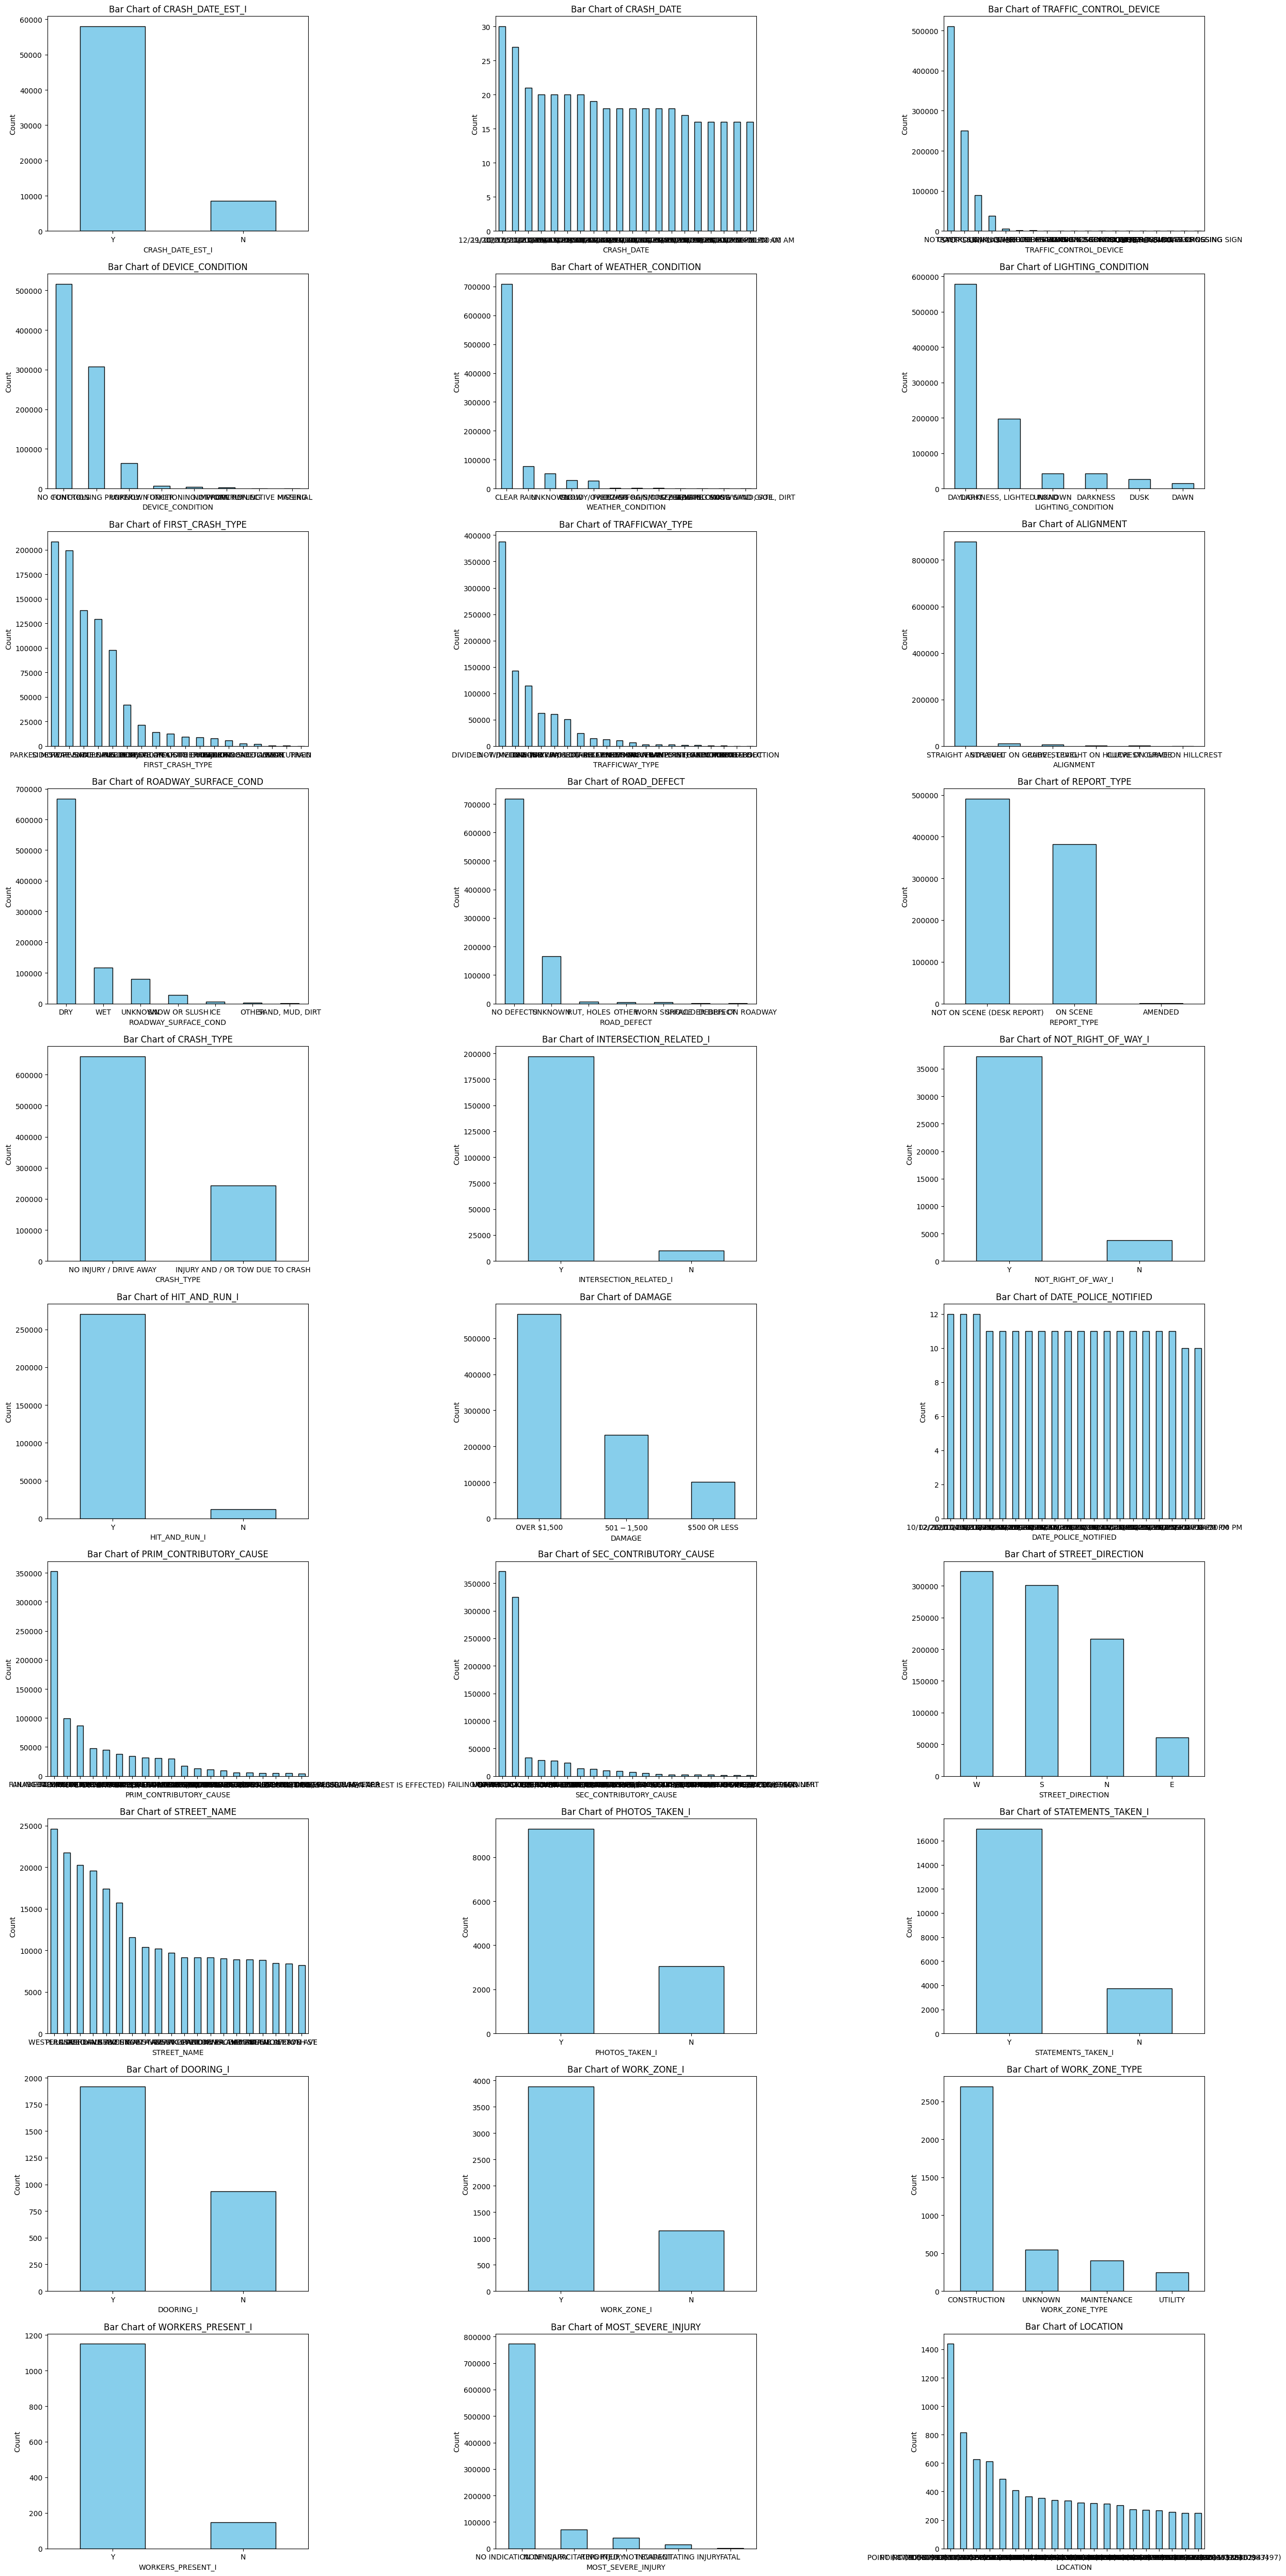

Analyzing date column 'CRASH_DATE'...

Earliest CRASH_DATE: 2013-03-03 16:48:00
Latest CRASH_DATE: 2024-12-12 21:58:00



In [8]:
# Data understanding for Crashes dataset
crashes_df = dataset_understanding('./data/Traffic_Crashes_-_Crashes_20241213.csv', date_col='CRASH_DATE')

### 2.2.2 People Dataset

Loading dataset from ./data/Traffic_Crashes_-_People_20241213.csv...

First 5 rows of the dataset:

  PERSON_ID PERSON_TYPE                                    CRASH_RECORD_ID  \
0   O749947      DRIVER  81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...   
1   O871921      DRIVER  af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...   
2    O10018      DRIVER  71162af7bf22799b776547132ebf134b5b438dcf3dac6b...   
3    O10038      DRIVER  c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...   
4    O10039      DRIVER  eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...   

   VEHICLE_ID              CRASH_DATE  SEAT_NO     CITY STATE ZIPCODE SEX  \
0    834816.0  09/28/2019 03:30:00 AM      NaN  CHICAGO    IL   60651   M   
1    827212.0  04/13/2020 10:50:00 PM      NaN  CHICAGO    IL   60620   M   
2      9579.0  11/01/2015 05:00:00 AM      NaN      NaN   NaN     NaN   X   
3      9598.0  11/01/2015 08:00:00 AM      NaN      NaN   NaN     NaN   X   
4      9600.0  11/01/2015 10:15:00 AM      NaN

Number of unique values: 14121

-------------------------------------------------- 

Value counts for column 'STATE':
IL    1380086
IN      22826
XX       9448
WI       7095
MI       5331
FL       3882
TX       3202
CA       2924
OH       2762
IA       2057
GA       1990
MO       1744
MN       1744
NY       1622
WA       1328
TN       1205
AZ       1016
NC        924
PA        857
CO        717
NJ        699
ID        696
KY        692
VA        617
MD        589
MS        560
MA        542
AL        522
NV        454
LA        439
AR        399
NB        370
SC        355
KS        345
OK        330
CT        222
OR        220
UT        167
NM        140
SD        113
ND        105
DC         94
MT         90
NH         75
HI         66
DE         65
ME         62
WV         60
WY         55
RI         48
AK         47
VT         37
Name: STATE, dtype: int64
Number of unique values: 52

-------------------------------------------------- 

Value counts for column 'ZIPCODE':
60629      

NO CONTRASTING CLOTHING    30549
CONTRASTING CLOTHING        5006
OTHER LIGHT SOURCE USED     2227
REFLECTIVE MATERIAL          975
Name: PEDPEDAL_VISIBILITY, dtype: int64
Number of unique values: 4

-------------------------------------------------- 

Value counts for column 'PEDPEDAL_LOCATION':
IN ROADWAY         16866
IN CROSSWALK       12951
UNKNOWN/NA          3278
NOT IN ROADWAY      1714
BIKEWAY             1690
BIKE LANE           1525
DRIVEWAY ACCESS      554
SHOULDER             250
Name: PEDPEDAL_LOCATION, dtype: int64
Number of unique values: 8

-------------------------------------------------- 

Value counts for column 'BAC_RESULT':
TEST NOT OFFERED                   1553695
TEST REFUSED                         16157
TEST PERFORMED, RESULTS UNKNOWN       3713
TEST TAKEN                            2783
Name: BAC_RESULT, dtype: int64
Number of unique values: 4

-------------------------------------------------- 

Value counts for column 'BAC_RESULT VALUE':
0.00    204
0.18 

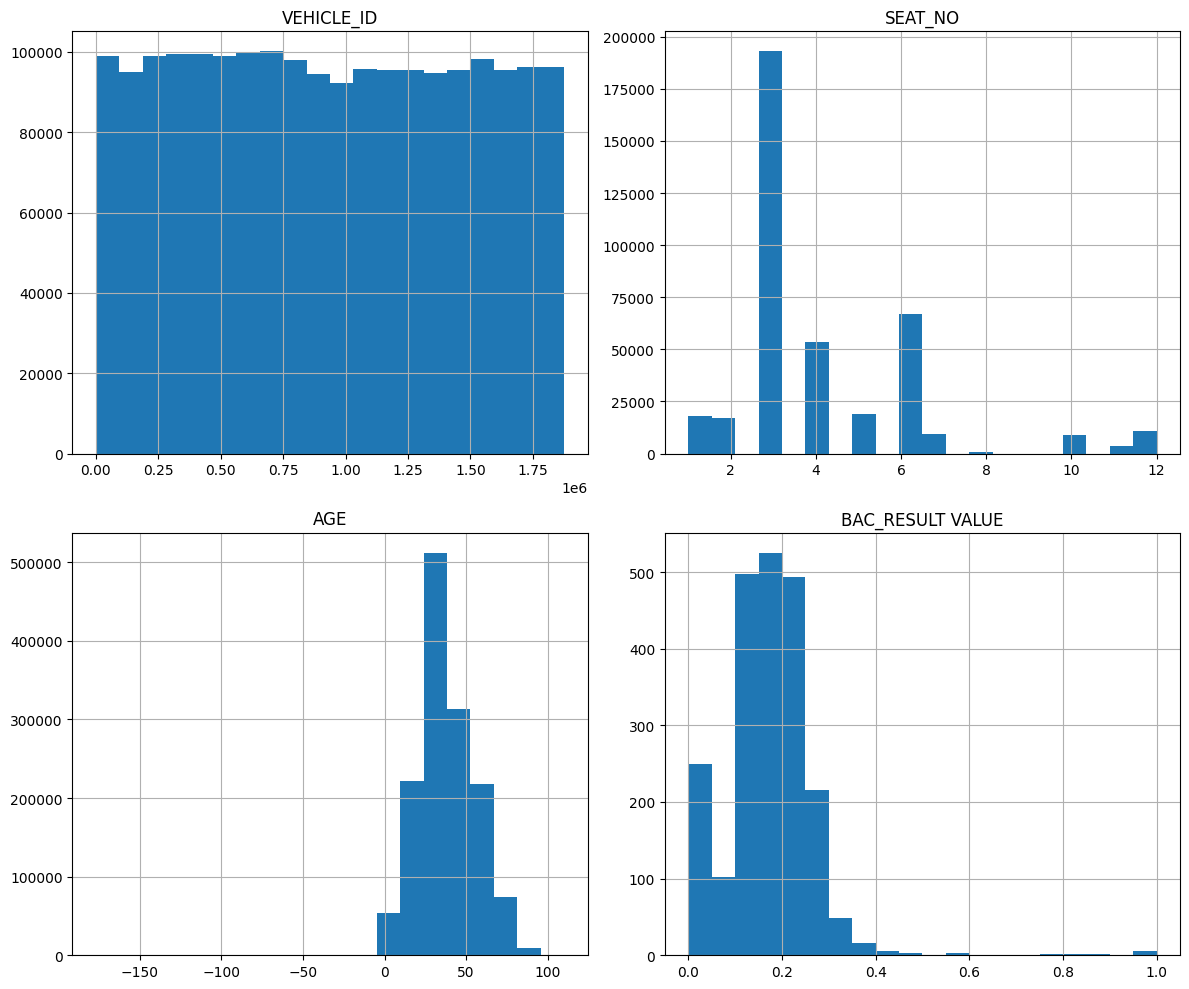

Plotting bar charts for categorical features (top 20 categories)...



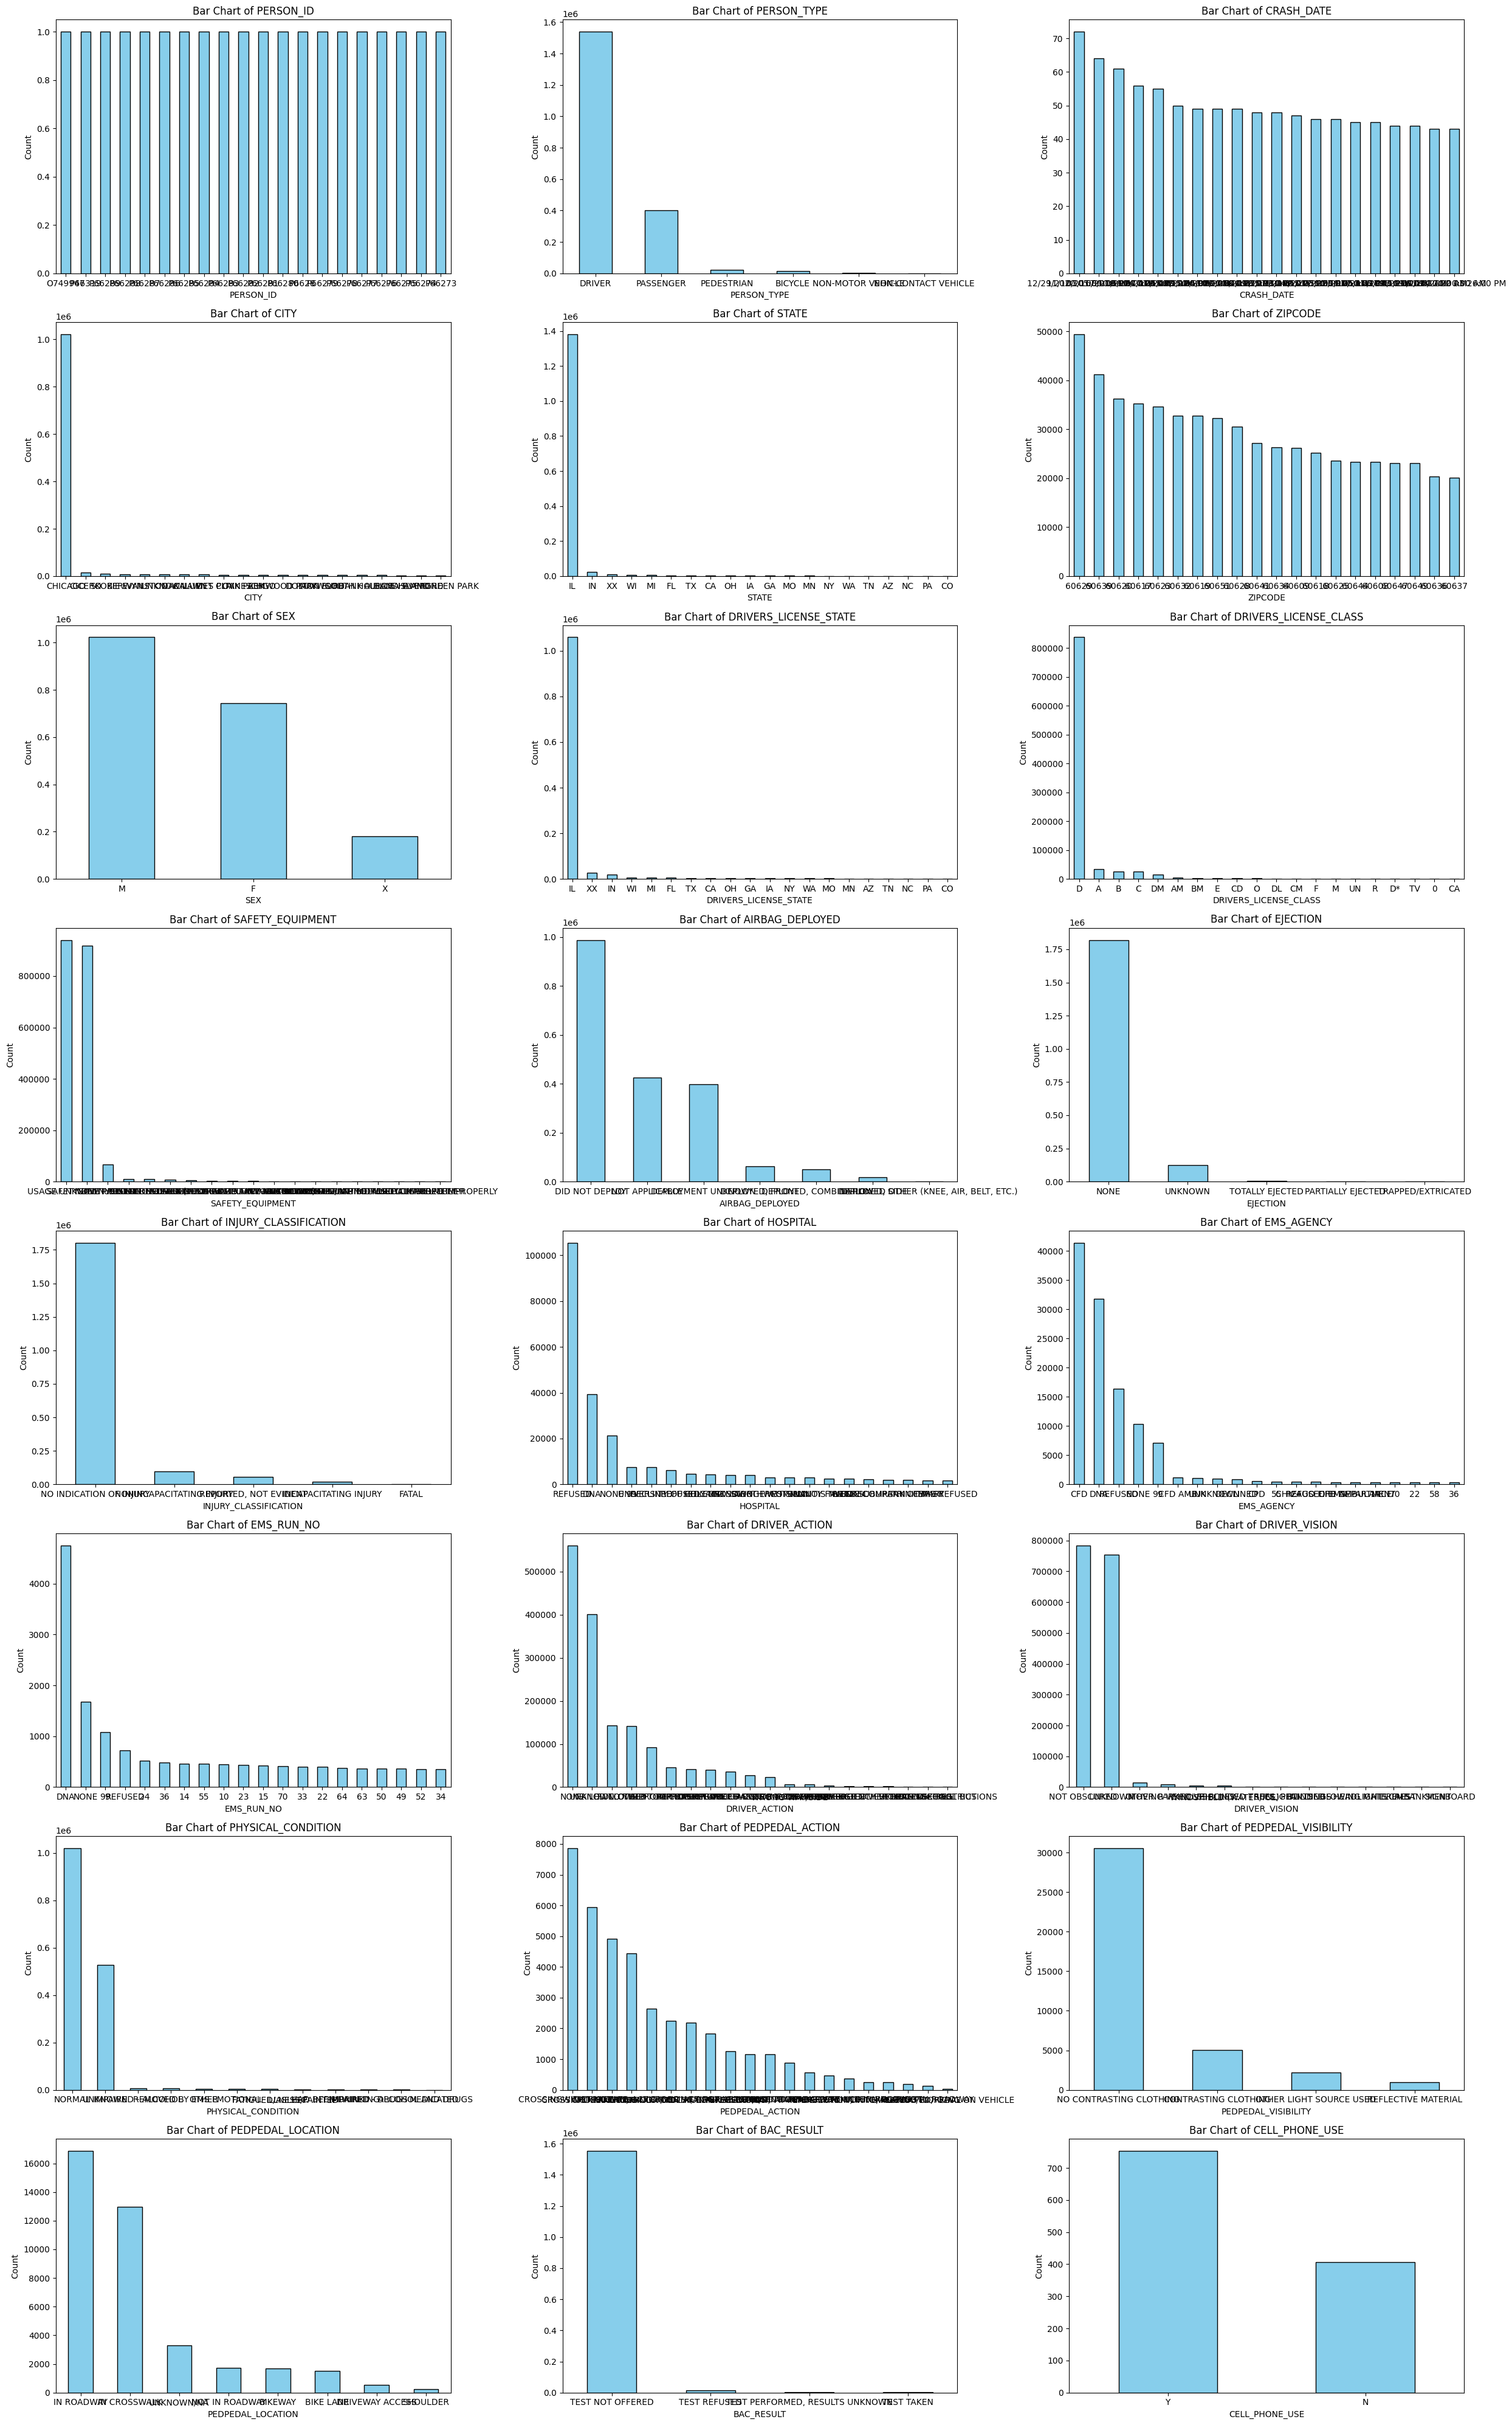

Analyzing date column 'CRASH_DATE'...

Earliest CRASH_DATE: 2013-03-03 16:48:00
Latest CRASH_DATE: 2024-12-12 21:58:00



In [9]:
# Data understanding for People dataset
people_df = dataset_understanding('./data/Traffic_Crashes_-_People_20241213.csv', date_col = 'CRASH_DATE')

### 2.2.3 Vehicles Dataset

Loading dataset from ./data/Traffic_Crashes_-_Vehicles_20241213.csv...

First 5 rows of the dataset:

   CRASH_UNIT_ID                                    CRASH_RECORD_ID  \
0        1717556  7b1763088507f77e0e552c009a6bf89a4d6330c7527706...   
1        1717574  2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...   
2        1717579  a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...   
3        1720118  609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...   
4        1720119  609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...   

               CRASH_DATE  UNIT_NO UNIT_TYPE  NUM_PASSENGERS  VEHICLE_ID  \
0  12/06/2023 03:24:00 PM        1    DRIVER             NaN   1634931.0   
1  12/06/2023 04:00:00 PM        2    DRIVER             NaN   1634978.0   
2  12/06/2023 04:30:00 PM        1    DRIVER             NaN   1634948.0   
3  12/10/2023 12:12:00 PM        1    DRIVER             NaN   1637401.0   
4  12/10/2023 12:12:00 PM        2    DRIVER             NaN   1637408.0   

  CMRC_VEH_I  

Number of unique values: 592717

-------------------------------------------------- 

Value counts for column 'UNIT_NO':
1          905518
2          853419
3           61383
4           12623
5            3367
6            1057
7             403
8             177
9              82
10             43
0              37
11             23
12             15
13             10
14              9
15              8
16              7
17              5
18              5
3778035         1
Name: UNIT_NO, dtype: int64
Number of unique values: 20

-------------------------------------------------- 

Value counts for column 'UNIT_TYPE':
DRIVER                 1538850
PARKED                  242156
PEDESTRIAN               23403
BICYCLE                  14714
DRIVERLESS               14536
NON-MOTOR VEHICLE         1665
NON-CONTACT VEHICLE        327
DISABLED VEHICLE           280
EQUESTRIAN                   8
Name: UNIT_TYPE, dtype: int64
Number of unique values: 9

-----------------------------------

Number of unique values: 28

-------------------------------------------------- 

Value counts for column 'TOWED_I':
Y    215706
N     12400
Name: TOWED_I, dtype: int64
Number of unique values: 2

-------------------------------------------------- 

Value counts for column 'FIRE_I':
Y    826
N    678
Name: FIRE_I, dtype: int64
Number of unique values: 2

-------------------------------------------------- 

Value counts for column 'OCCUPANT_CNT':
1.0     1300955
0.0      236908
2.0      181508
3.0       47604
4.0       18893
5.0        6204
6.0        1649
7.0         661
8.0         249
9.0         117
11.0         75
10.0         70
12.0         44
13.0         39
15.0         20
14.0         17
16.0         16
18.0         13
20.0         12
19.0         10
17.0          8
28.0          8
25.0          6
26.0          6
36.0          5
21.0          5
29.0          5
44.0          4
27.0          4
41.0          4
35.0          4
33.0          3
23.0          3
30.0          3
22.0  

Number of unique values: 51

-------------------------------------------------- 

Value counts for column 'CARRIER_CITY':
CHICAGO              4396
GARY                  211
NOBLESVILLE           184
ARLINGTON HEIGHTS     171
INDIANAPOLIS          169
                     ... 
BEAVERCREEK             1
ARLING HEIGHTS          1
VALLEY CITY             1
HODGSKINS               1
CONKLIN                 1
Name: CARRIER_CITY, Length: 2140, dtype: int64
Number of unique values: 2140

-------------------------------------------------- 

Value counts for column 'HAZMAT_PLACARDS_I':
N    241
Y    115
Name: HAZMAT_PLACARDS_I, dtype: int64
Number of unique values: 2

-------------------------------------------------- 

Value counts for column 'HAZMAT_NAME':
FLAMMABLE               7
CORROSIVE               5
GASOLINE                5
FLAMMABLE LIQUID        4
PROPANE                 3
OXIDIZER                2
DIESEL FUEL             2
FLAMMABLE GAS           2
NITROGEN                2
FLAMAB

Plotting histograms for numeric features...



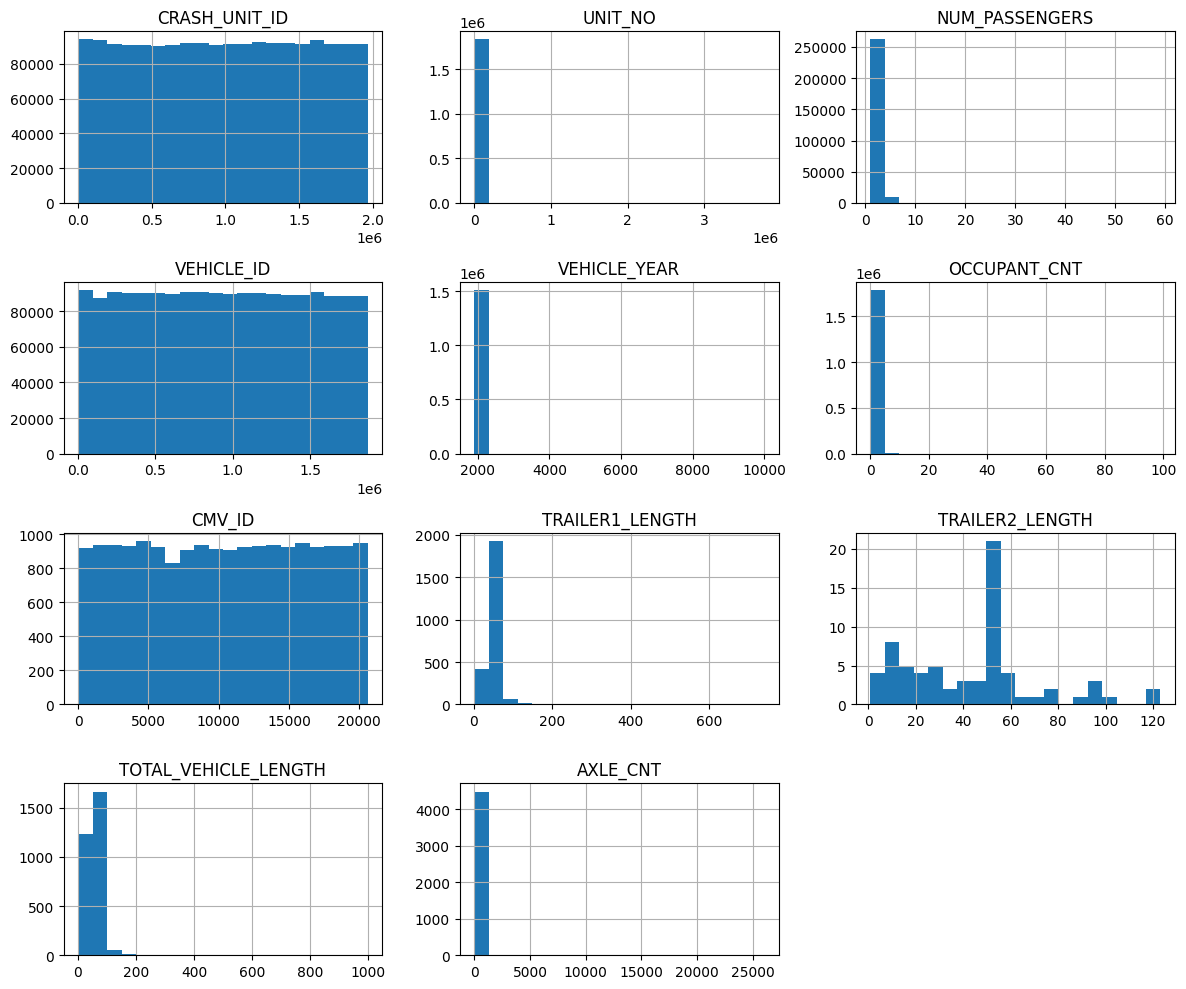

Plotting bar charts for categorical features (top 20 categories)...



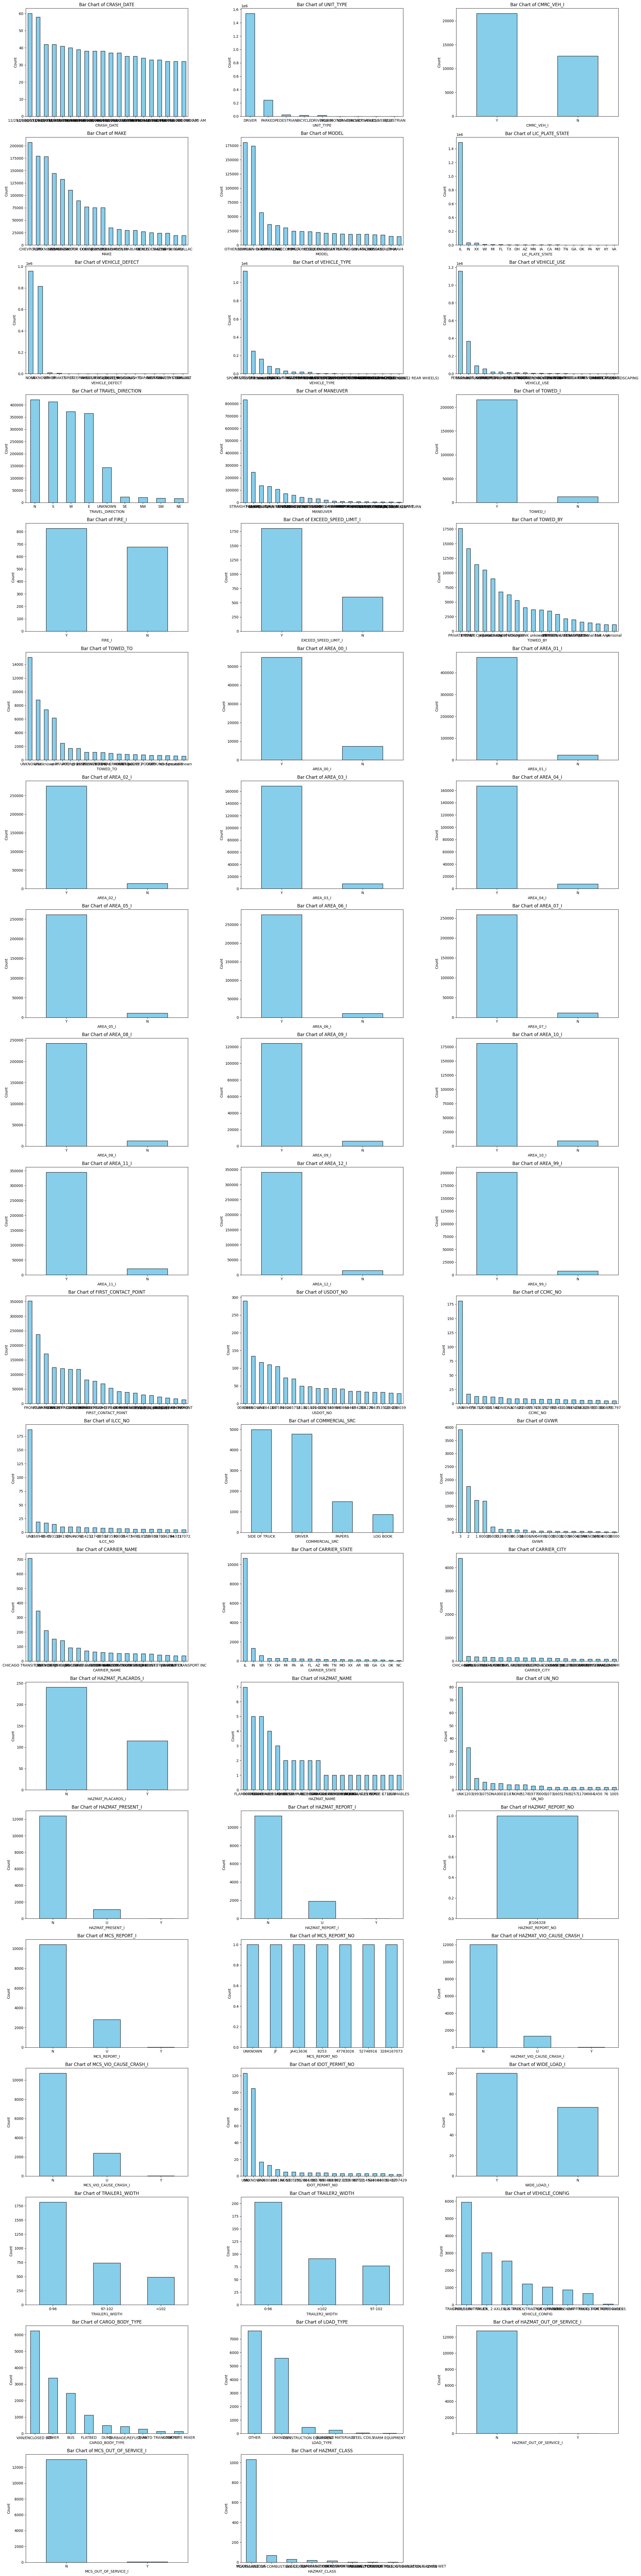

Analyzing date column 'CRASH_DATE'...

Earliest CRASH_DATE: 2013-03-03 16:48:00
Latest CRASH_DATE: 2024-12-12 21:58:00



In [10]:
# Data understanding for Vehicles dataset
vehicles_df = dataset_understanding('./data/Traffic_Crashes_-_Vehicles_20241213.csv', date_col = 'CRASH_DATE')

## 3. <a name ="Data-Preparation"></a> Data Preparation

## 4. <a name ="Exploratory-Data-Analysis"></a>Exploratory Data Analysis (EDA)

## 5. <a name ="Modeling"></a>  Modeling

## 6. <a name ="Evaluation"></a> Evaluation

## 7. <a name ="Conclusion"></a> Conclusion

### 7.1 <a name ="Limitations"></a> Limitations

### 7.2 <a name ="Recommendations"></a> Recommendations

### 7.3 <a name ="Next-Steps"></a> Next Steps